In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import numpy.linalg as la
from matplotlib import gridspec

In [3]:
def add_relative_to_current_source_file_path_to_sys_path(relpath):
    import os, sys, inspect
    path = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0],relpath)))
    if path not in sys.path:
        sys.path.insert(0,path)

add_relative_to_current_source_file_path_to_sys_path("../../shims/toric")   

import toric
import toric.samples
import toric.shims

#
# Helper functions for the toric libary
#

def vector3_to_str(v):
    return "(%.2f, %.2f, %.2f)" % (v.x(), v.y(), v.z())

def quaternion_to_str(q):
    return "(w,x,y,z): (%.2f, %.2f, %.2f, %.2f)" % (q.w(), q.x(), q.y(), q.z())

def vector3_to_np3(v):
    return np.array([v.x(),v.y(),v.z()])

def np3_to_vector3(v):
    return toric.Vector3(v[0],v[1],v[2])

def slerp(p0, p1, t):
        omega = np.arccos(np.dot(p0/np.linalg.norm(p0), p1/np.linalg.norm(p1)))
        so = np.sin(omega)
        return np.sin((1.0-t)*omega) / so * p0 + np.sin(t*omega)/so * p1

def drawSetup(fudgeX=2, fudgeY_pos=2,fudgeY_neg=8):
    pylab.rcParams['figure.figsize'] = 8, 8

    plt.axes().set_aspect('equal')
    fig = plt.gcf()
    
    # Set up plot size
    plt.axes().set_xlim((np.min([PA_1.x(), PB_1.x()])-fudgeX,np.max([PA_1.x(), PB_1.x()])+fudgeX))
    plt.axes().set_ylim((np.min([PA_1.y(), PB_1.y()])-fudgeY_neg,np.max([PA_1.y(), PB_1.y()])+fudgeY_pos))

    # Draw People Positions
    plt.scatter([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()],c="red",linewidths=0)
    line_AB = plt.Line2D([PA_1.x(), PB_1.x()],[PA_1.y(), PB_1.y()], c="black",alpha=0.3)
    fig.gca().add_artist(line_AB)

    # Draw Circles    
    circle_PA_1=plt.Circle((PA_1.x(),PA_1.y()),min_dist,color='g',alpha=0.5)
    circle_PB_1=plt.Circle((PB_1.x(),PB_1.y()),min_dist,color='g',alpha=0.5)
    
    fig.gca().add_artist(circle_PA_1)
    fig.gca().add_artist(circle_PB_1)

    plt.annotate(s="A", xy=(PA_1.x(),PA_1.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="B", xy=(PB_1.x(),PB_1.y()),xytext=(3,4),textcoords="offset points")
    
    # Draw Camera positions
    plt.scatter([C_1.x(), C_2.x()],[C_1.y(), C_2.y()],c="blue",linewidths=0)
    plt.annotate(s="C1", xy=(C_1.x(), C_1.y()),xytext=(3,4),textcoords="offset points")
    plt.annotate(s="C2", xy=(C_2.x(), C_2.y()),xytext=(3,4),textcoords="offset points")

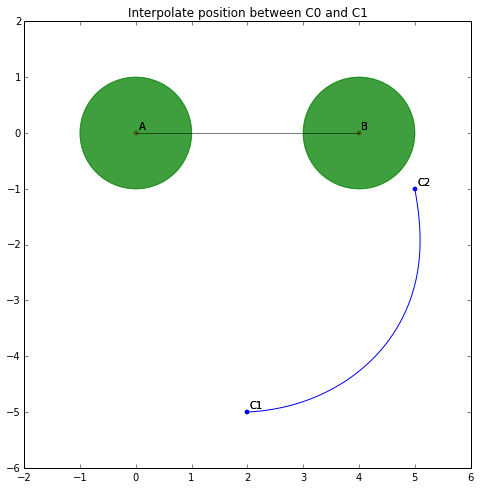

In [16]:
min_dist = 1                    # let's set a minimum distance of 1m
PA_1 = toric.Vector3(0,0,0)     # person A position
PB_1 = toric.Vector3(4,0,0)     # person B position
C_1 = toric.Vector3(2,-5,0)     # Starting camera position is *outside* of PA_1
C_2 = toric.Vector3( 5,-1,0)    # Ending camera position

drawSetup(fudgeY_neg=2)
plt.title("Interpolate position between C0 and C1")

C_1t = toric.Toric3_FromWorldPosition(C_1, PA_1, PB_1)
C_2t = toric.Toric3_FromWorldPosition(C_2, PA_1, PB_1)

interp = toric.ToricInterpolator(PA_1, PB_1, C_1t, C_2t)

t = np.linspace(0,1)
sigma = np.array([toric.Toric3_ToWorldPosition(interp.interpolate(a),PA_1,PB_1).np() for a in t])

drawSetup(fudgeY_neg=6)
plt.plot(sigma[:,0],sigma[:,1])

In [17]:
aspect = 16./9

# apex shot
SA_1 = toric.Vector2(-0.33, 0)#toric.Vector2(0.33, 0.5)
SB_1 = toric.Vector2(0.33, 0)#toric.Vector2(0.66, 0.5)
fovX_1 = toric.RadianPi(2 * np.arctan(6./5)) # geometrically calculated by hand
fovY_1 = toric.RadianPi(fovX_1.valueRadians() / aspect)

# over the shoulder shot (of A over B's shoulder)
PA_2 = PA_1
PB_2 = PB_1
SA_2 = toric.Vector2(-0.33, 0.33)
SB_2 = toric.Vector2(0.4, 0)
fovY_2 = toric.RadianPi(1.0472) # 60 degrees, used Unity
fovX_2 = toric.RadianPi(fovY_2.valueRadians() * aspect)

50
['FromAxes', 'FromRotationMatrix', 'IDENTITY', 'ToAxes', 'ToRotationMatrix', 'ZERO', '__class__', '__del__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__hash__', '__init__', '__module__', '__mul__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', 'dotProduct', 'inverse', 'norm', 'norm2', 's', 'set', 'this', 'v', 'w', 'x', 'xAxis', 'y', 'yAxis', 'z', 'zAxis']


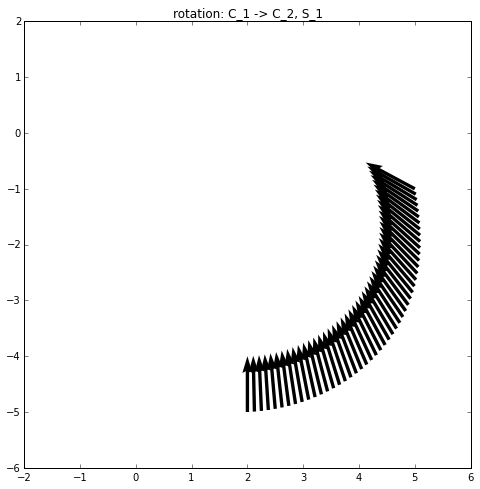

In [74]:
def slerp(p0, p1, t):
    omega = np.arccos(np.dot(p0/np.linalg.norm(p0), p1/np.linalg.norm(p1)))
    so = np.sin(omega)
    return np.sin((1.0-t)*omega) / so * p0 + np.sin(t*omega)/so * p1

rotation_C1_S1 = toric.Toric3_ComputeOrientationForTwoTargets(C_1, SA_1, SB_1, PA_1, PB_1, fovX_1, fovY_1)
rotation_C2_S1 = toric.Toric3_ComputeOrientationForTwoTargets(C_2, SA_1, SB_1, PA_1, PB_1, fovX_1, fovY_1)

rotation_C1_S2 = toric.Toric3_ComputeOrientationForTwoTargets(C_1, SA_2, SB_2, PA_2, PB_2, fovX_2, fovY_2)
rotation_C2_S2 = toric.Toric3_ComputeOrientationForTwoTargets(C_2, SA_2, SB_2, PA_2, PB_2, fovX_2, fovY_2)

#tc = np.c_[np.linspace(0,1)]
#S1_slerp = np.apply_along_axis(lambda tc : slerp(rotation_C1_S1.yAxis(),rotation_C2_S1.yAxis(),tc), axis=1, arr=tc)
#S2_slerp = np.apply_along_axis(lambda tc : slerp(rotation_C1_S2.yAxis(),rotation_C2_S2.yAxis(),tc), axis=1, arr=tc)


# for each point along the position trajectory
# calculate the first and final framing orientation
rotations_S1 = np.array([toric.Toric3_ComputeOrientationForTwoTargets(np3_to_vector3(c), SA_1, SB_1, PA_1, PB_1, fovX_1, fovY_1) for c in sigma])
rotations_S2 = np.array([toric.Toric3_ComputeOrientationForTwoTargets(np3_to_vector3(c), SA_2, SB_2, PA_2, PB_2, fovX_2, fovY_2) for c in sigma])

print rotations_S2.size
print dir(rotations_S2[0])

vectors_S1 = np.array([v.yAxis().np() for v in rotations_S1])
vectors_S2 = np.array([v.yAxis().np() for v in rotations_S2])

fig = plt.figure()
f1 = fig.add_subplot(111)
f1.quiver(sigma[:,0],sigma[:,1],vectors_S1[:,0],vectors_S1[:,1],angles='xy',scale_units='xy',scale=1)
f1.set_ylim([-6,2])
f1.set_xlim([-2,6])
f1.set_title("rotation: C_1 -> C_2, S_1")
f1.set_aspect('equal')

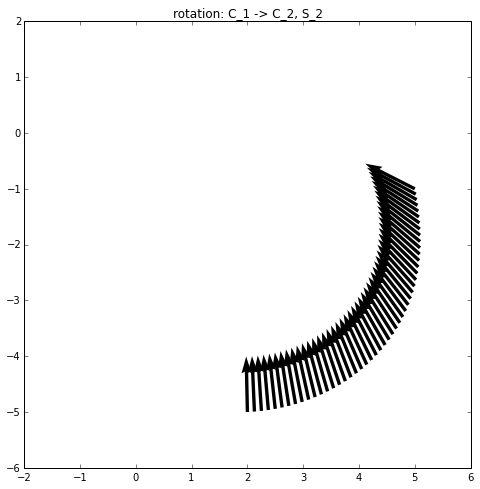

In [73]:
fig = plt.figure()
f1 = fig.add_subplot(111)
f1.quiver(sigma[:,0],sigma[:,1],vectors_S2[:,0],vectors_S2[:,1],angles='xy',scale_units='xy',scale=1)
f1.set_ylim([-6,2])
f1.set_xlim([-2,6])
f1.set_title("rotation: C_1 -> C_2, S_2")
f1.set_aspect('equal')

In [ ]:
# slerp between S1 and S2 based on progress along position path <- this could be timed differently